# Goal: Classify hand-written digit using CNN
    
Dataset: MNIST digit dataset
         * A large database of handwritten digits (0 to 9). 
         * The database contains 60,000 training images & 10,000 testing images. 
         * Each image is of size 28x28. 

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#Load MNIST data
(x_train, y_train), (x_rest, y_rest) = mnist.load_data()

In [3]:
# Data other than training
print('Data left for testing',x_rest.shape)

Data left for testing (10000, 28, 28)


In [4]:
#Extracting test and validation data from the remaining data
x_val, x_test, y_val, y_test = train_test_split(
    x_rest, y_rest, test_size=0.3, random_state=0)

In [5]:
print('Validation data shape',x_val.shape)
print('Test data shape',x_test.shape)

Validation data shape (7000, 28, 28)
Test data shape (3000, 28, 28)


In [6]:
#Use 'Shape' to retrieve number of samples in training, validation and testing

train_samples = x_train.shape[0]
test_samples = x_test.shape[0]
val_samples = x_val.shape[0]

#Input reshape. The model expects an input with 4 dimensions.
#Reshape your data to (n_images, x_shape, y_shape, n_channels).
x_train = x_train.reshape(train_samples,28,28,1)
x_val = x_val.reshape(val_samples,28,28,1)
x_test = x_test.reshape(test_samples,28,28,1)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
num_unique_classes = set(y_train)
print('Number of unique classes', num_unique_classes)
num_classes = len(num_unique_classes)
print('Number of classes', num_classes)

Number of unique classes {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Number of classes 10


In [9]:
# input image dimensions
img_rows, img_cols = x_train.shape[1], x_train.shape[2]
print('Image width', img_rows)
print('Image Height', img_cols)

# convert class vectors to binary class matrices
y_train_enc = keras.utils.to_categorical(y_train, num_classes)
print('training encoded colums', y_train.shape)
y_val_enc = keras.utils.to_categorical(y_val, num_classes)
y_test_enc = keras.utils.to_categorical(y_test, num_classes)

Image width 28
Image Height 28
training encoded colums (60000,)


# Build CNN model

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                270450    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 271,280
Trainable params: 271,280
Non-trainable params: 0
_________________________________________________________________


In [12]:
epochs = 1
batch_size = 128

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train_enc,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val_enc))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 7000 samples
Epoch 1/1
60000/60000 [==============================] - 12s 193us/step - loss: 5.0636 - acc: 0.6641 - val_loss: 0.2099 - val_acc: 0.9510


In [13]:
pred = model.predict(x_test)

In [14]:
predicted=[]
for i in pred:
    predicted.append(np.argmax(i))

In [15]:
print("Test error is:",100-round(metrics.accuracy_score(y_test,predicted)*100,2))

Test error is: 5.6299999999999955


In [16]:
misclassified_sample = []
index = 0
for actual, predict in zip(y_test, predicted):
    if actual != predict:
        misclassified_sample.append(index)
    index += 1

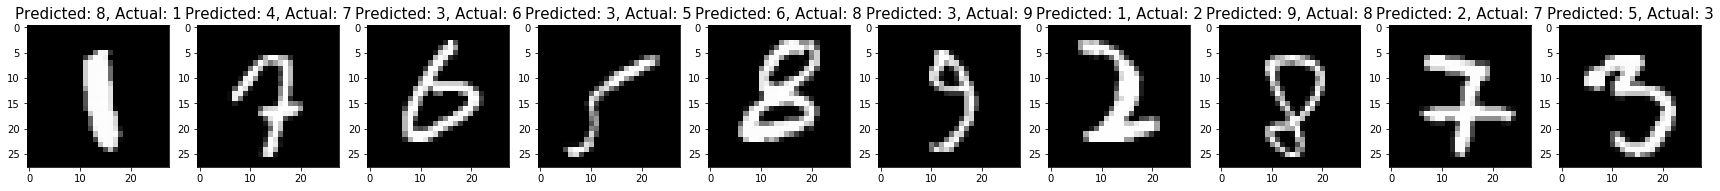

In [17]:
plt.figure(figsize=(30,5))
for index, fail_index in enumerate(misclassified_sample[0:10]):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(x_test[fail_index], (28,28)), cmap='gray')
    plt.title('Predicted: {}, Actual: {}'.format(predicted[fail_index], y_test[fail_index]), fontsize = 15)